In [2]:
import geopandas

In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [5]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

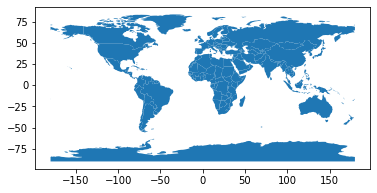

In [6]:
world.plot()

C:\Users\brige\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

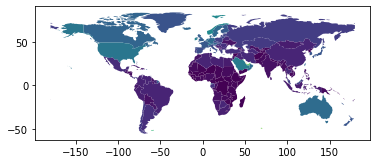

In [7]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap')

In [8]:
import matplotlib.pyplot as plt

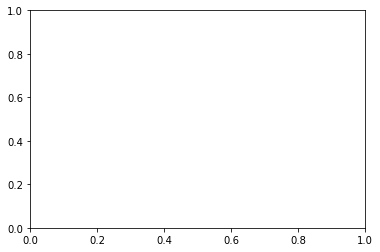

In [9]:
fig, ax = plt.subplots(1, 1)

In [11]:
world.plot(column='pop_est', ax=ax, legend=True)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

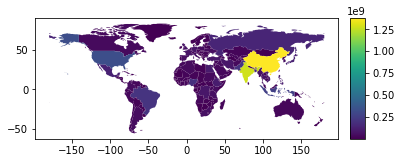

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

<AxesSubplot:>

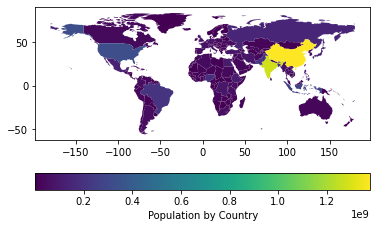

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

<AxesSubplot:>

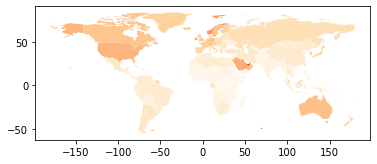

In [15]:
world.plot(column='gdp_per_cap', cmap='OrRd')

<AxesSubplot:>

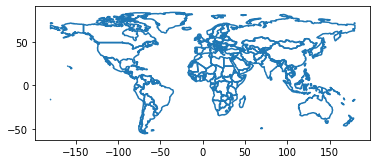

In [16]:
world.boundary.plot()

<AxesSubplot:>

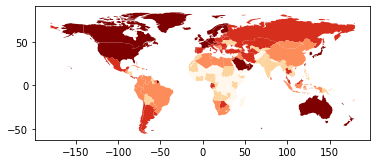

In [17]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

<AxesSubplot:>

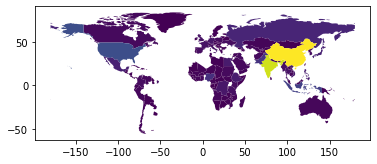

In [18]:
import numpy as np

world.loc[np.random.choice(world.index, 40), 'pop_est'] = np.nan

world.plot(column='pop_est')

<AxesSubplot:>

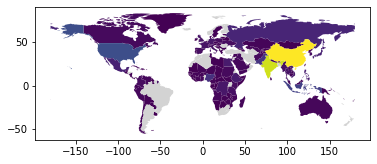

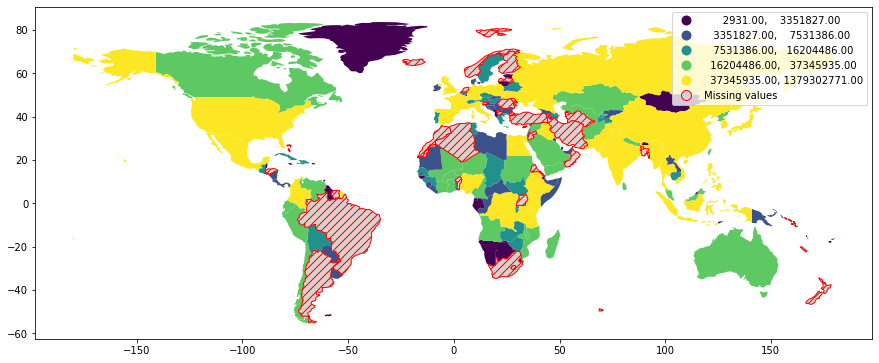

In [19]:
world.plot(column='pop_est', missing_kwds={'color': 'lightgrey'});

world.plot(
    column="pop_est",
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
)

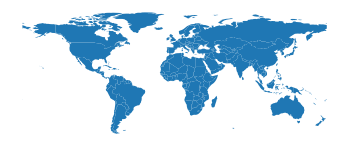

In [20]:
ax = world.plot()

ax.set_axis_off()

<AxesSubplot:>

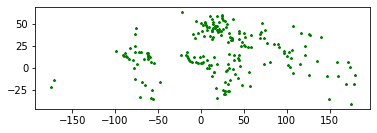

In [21]:
cities.plot(marker='*', color='green', markersize=5)

In [22]:
cities = cities.to_crs(world.crs)

<AxesSubplot:>

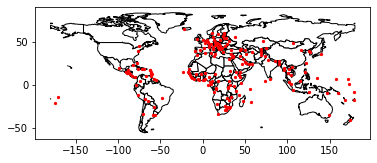

In [23]:
base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5)

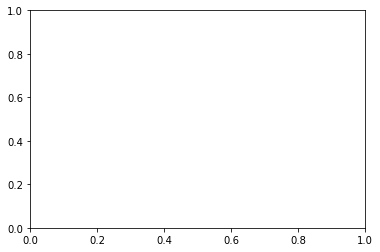

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

In [25]:
ax.set_aspect('equal')

In [26]:
world.plot(ax=ax, color='white', edgecolor='black')

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [29]:
cities.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

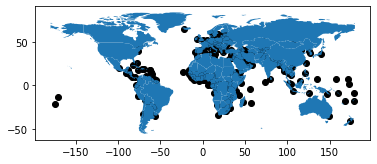

In [30]:
ax = cities.plot(color='k')

world.plot(ax=ax)

<AxesSubplot:>

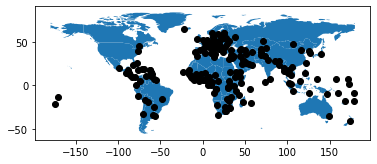

In [31]:
ax = cities.plot(color='k', zorder=2)

world.plot(ax=ax, zorder=1)

<AxesSubplot:xlabel='pop_est', ylabel='gdp_md_est'>

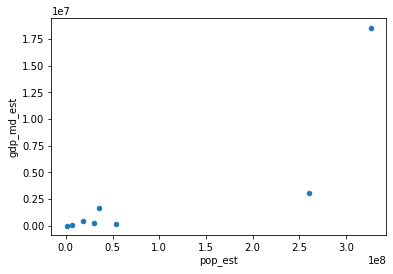

In [32]:
gdf = world.head(10)

gdf.plot(kind='scatter', x="pop_est", y="gdp_md_est")

<AxesSubplot:>

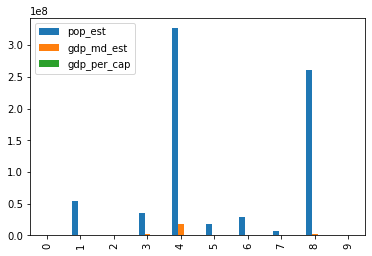

In [33]:
gdf.plot.bar()